[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Example 8.38

Synthetic example showing that correlation does not imply causation, as it can be due to confounding factors\
Topics: Correlation and causation, confounder, causal inference

Author: Carlos Fernandez-Granda

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True
from numpy.random import default_rng

font_size = 15
font_size_ticks = 15
font_size_clabels = 15

tmin = -3.99
tmax = 3.99
cmin = -3.99
cmax = 3.99
ymin = -3.99
ymax = 3.99
t = np.linspace(tmin, tmax, 200)
c = np.linspace(cmin, cmax, 200)
y = np.linspace(ymin, ymax, 200)

C,T = np.meshgrid(c,t)
Y,T = np.meshgrid(y,t)

In [3]:
def gaussian(x,y,invSigma,Sigma):
        return (np.exp(-(invSigma[0,0] * x**2 + 2*invSigma[0,1]*x*y + invSigma[1,1] * y**2)/2)
                      /(2 * np.pi * np.sqrt(np.linalg.det(Sigma))))
    
def fmt(x):
    s = f"{x:.4f}"
    if s.endswith("0"):
        s = f"{x:.1f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"

n=200

markersize = 15

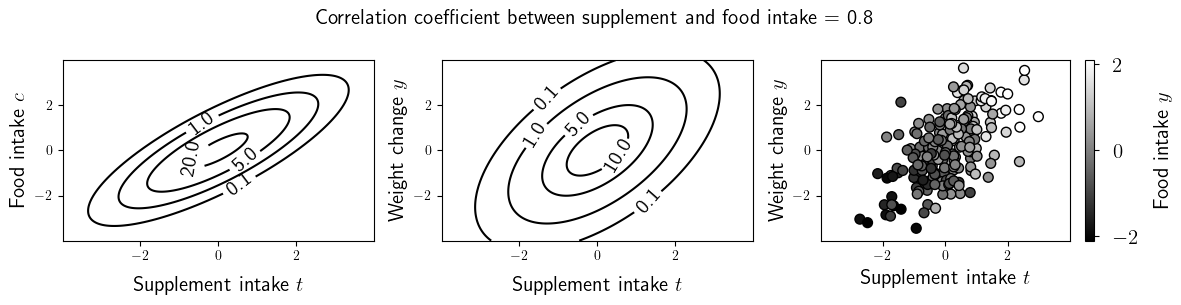

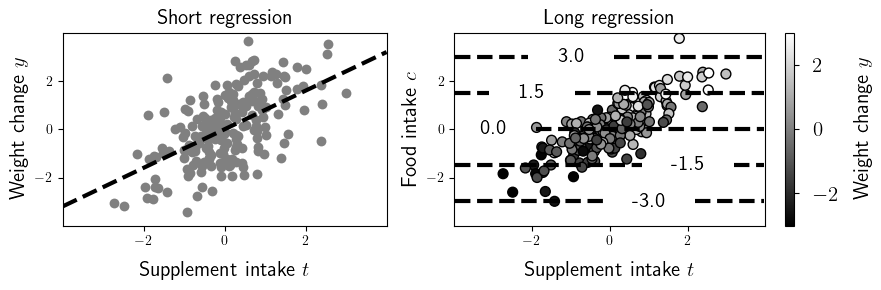

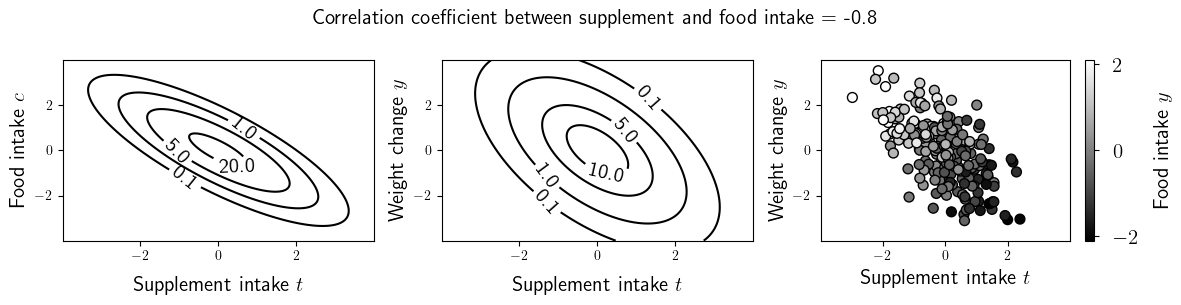

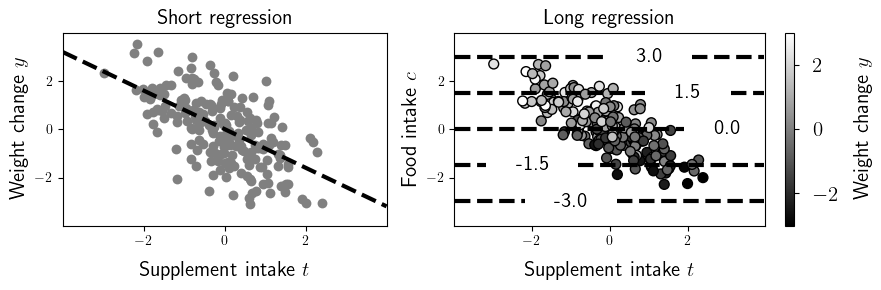

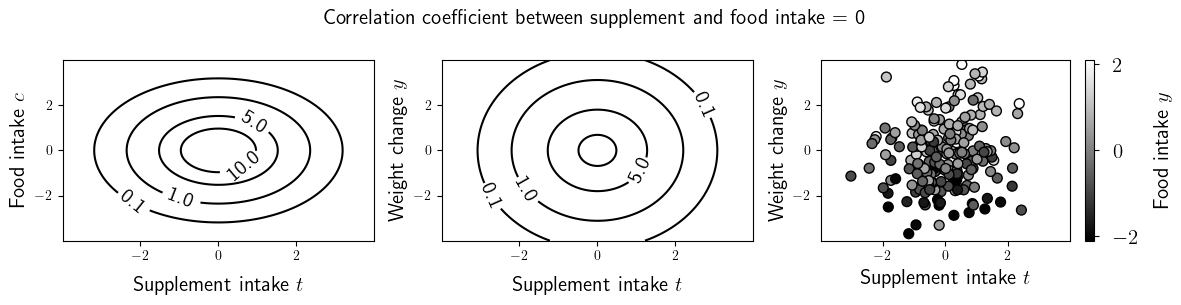

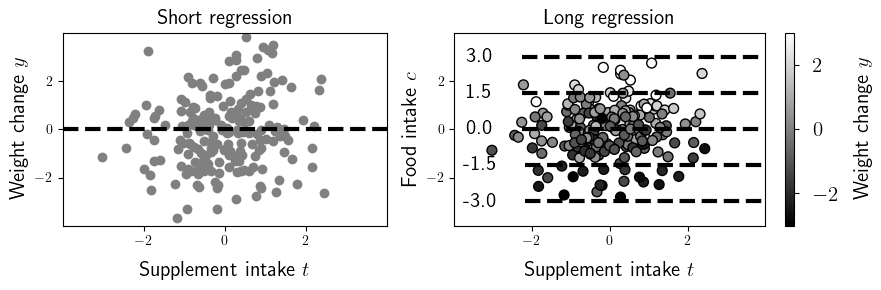

In [11]:
rng = default_rng(2024)

sigma_tc_vals = [0.8, -0.8, 0]
scatter_size_large = 50
scatter_size_small = 50

levels_weight_tc = [0.1,1,5,20]
levels_weight_tc_aux = [0.1,1,5,10]
levels_weight_yc = [0.1,1,5,10]

manual_locations = [ [(-1, 3),(-2,1.5),(-3,0),  (2, -1.5), (1, -3)],
                    [(1, 3),(2,1.5),(3,0),  (-2, -1.5), (-1, -3)],
                    [(-3.35,3),(-3.35,1.5),(-3.35, 0),(-3.35, -1.5), (-3.35, -3)] ] 

v_max = 2.1
v_min = -2.1

for ind,sigma_tc in enumerate(sigma_tc_vals):

    Sigma_tc = np.array([[1,sigma_tc],[sigma_tc,1]])
    
    invSigma_tc = np.linalg.inv(Sigma_tc)

    z_tc = gaussian(T,C,invSigma_tc,Sigma_tc)

    fig, axes = plt.subplots(1, 3, figsize=(12,3),width_ratios=[1,1,1])
    fig.suptitle(r'Correlation coefficient between supplement and food intake = '+str(sigma_tc),fontsize=font_size,y = 1)

    if ind == 2:
        CS = axes[0].contour(T,C, 1e2*z_tc,colors='black', levels=levels_weight_tc_aux)
    else:
        CS = axes[0].contour(T,C, 1e2*z_tc,colors='black', levels=levels_weight_tc)
    axes[0].clabel(CS, CS.levels, inline=True, fmt=fmt,fontsize=font_size_clabels)
    axes[0].set_ylim([cmin,cmax])
    axes[0].set_xlim([tmin,tmax])
    axes[0].set_xlabel(r'Supplement intake $t$',fontsize=font_size,labelpad = 10)
    axes[0].set_ylabel(r'Food intake $c$',fontsize=font_size,labelpad = 5)
    
    Sigma_ty = np.array([[1,sigma_tc],[sigma_tc,2]])

    invSigma_ty = np.linalg.inv(Sigma_ty)

    z_yc = gaussian(T,C,invSigma_ty,Sigma_ty)

    CS = axes[1].contour(T,Y, 1e2*z_yc,colors='black', levels=levels_weight_yc)
    axes[1].clabel(CS, CS.levels, inline=True, fmt=fmt,fontsize=font_size_clabels)
    axes[1].set_ylim([ymin,ymax])
    axes[1].set_xlim([tmin,tmax])
    axes[1].set_xlabel(r'Supplement intake $t$',fontsize=font_size,labelpad = 10)
    axes[1].set_ylabel(r'Weight change $y$',fontsize=font_size,labelpad = 5)
    
    samples_tc = rng.multivariate_normal([0,0], Sigma_tc, size=n)
    samples_t = samples_tc[:,0]
    samples_c = samples_tc[:,1]
    samples_y = rng.normal(loc=samples_c)
    
    im = axes[2].scatter(samples_t,samples_y,c=samples_c,s=scatter_size_large,cmap="gray",edgecolors='black',linewidth=1,
                     vmin=v_min,vmax=v_max,rasterized=True)
    axes[2].set_ylim([ymin,ymax])
    axes[2].set_xlim([tmin,tmax])
    cbar = plt.colorbar(im,shrink=1)
    cbar.ax.tick_params(labelsize=font_size_ticks,pad = 10)
    cbar.set_label(label=r'Food intake $y$',fontsize=font_size,labelpad = 10)
    axes[2].set_xlabel(r'Supplement intake $t$',fontsize=font_size,labelpad = 5)
    axes[2].set_ylabel(r'Weight change $y$',fontsize=font_size,labelpad = 5)
    
    plt.tight_layout(); 

    fig, axes = plt.subplots(1, 2, figsize=(9,3),width_ratios=[1,1.2])

    axes[0].scatter(samples_t,samples_y,s=scatter_size_large,linewidth=0,color="gray",rasterized=True)
    axes[0].plot(t,sigma_tc * t,lw=3,
             color="black",ls="dashed",label="Linear model")
    axes[0].set_ylim([ymin,ymax])
    axes[0].set_xlim([tmin,tmax])
    axes[0].set_xlabel(r'Supplement intake $t$',fontsize=font_size,labelpad = 10)
    axes[0].set_ylabel(r'Weight change $y$',fontsize=font_size,labelpad = 5)
    axes[0].set_title(r'Short regression',fontsize=font_size)
    
    sc = axes[1].scatter(samples_t,samples_c,c=samples_y,s=scatter_size_large,linewidth=1,cmap="gray",edgecolor='black',vmax = 3,vmin = -3,
                rasterized=True)
    CS = axes[1].contour(C.T,colors="black", extent=[tmin,tmax,cmin,cmax], 
                    origin='lower',linewidths=3,linestyles="dashed",levels=5)
    axes[1].clabel(CS, fontsize=font_size_clabels, inline=1,fmt = '%1.1f',manual =manual_locations[ind],inline_spacing=35)
    cbar = plt.colorbar(sc,shrink=1)
    cbar.ax.tick_params(labelsize=font_size_ticks,pad = 10)
    cbar.set_label(label=r'Weight change $y$',fontsize=font_size,labelpad = 10)
    axes[1].set_ylim([cmin,cmax])
    axes[1].set_xlim([tmin,tmax])
    axes[1].set_xlabel(r'Supplement intake $t$',fontsize=font_size,labelpad = 10)
    axes[1].set_ylabel(r'Food intake $c$',fontsize=font_size,labelpad = 5)
    axes[1].set_title(r'Long regression',fontsize=font_size)

    plt.tight_layout();